This example demonstrates how to simulate steady channel flow in **20 lines of code!** We recommend using a Python notebook (`.ipynb`) for an interactive experience.

### 1. Define the Geometry and Physics

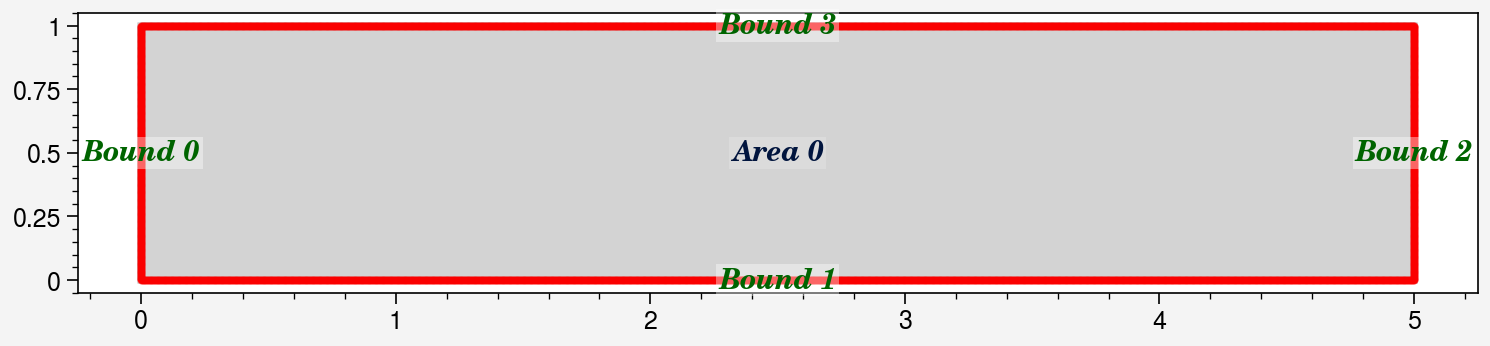

In [1]:
import deepflow as df
df.manual_seed(69)

# Create a 5x1 rectangle
rectangle = df.geometry.rectangle([0, 5], [0, 1])
domain = df.domain(rectangle)
domain.show_setup()

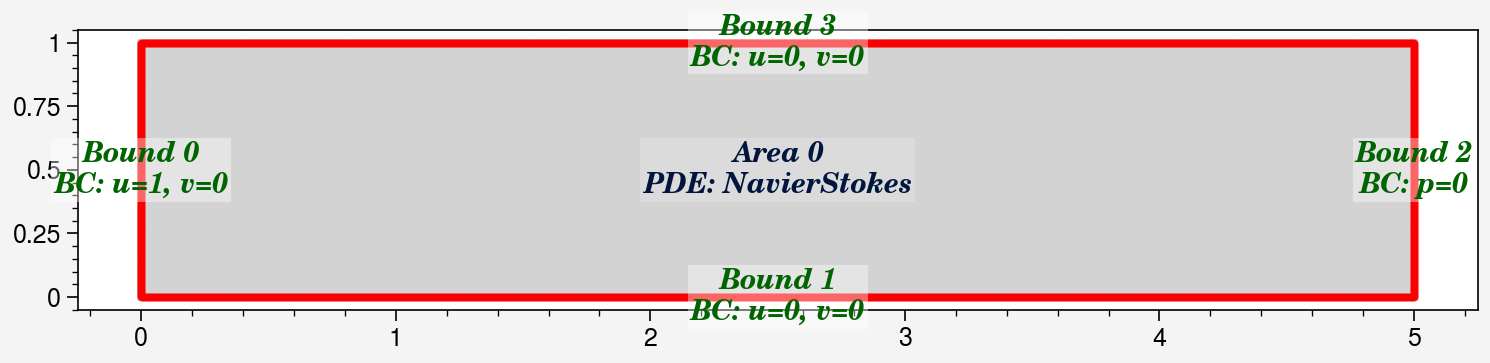

In [2]:
# Define Boundary Conditions
domain.bound_list[0].define_bc({'u': 1, 'v': 0})   # Inflow: u=1
domain.bound_list[1].define_bc({'u': 0, 'v': 0})  # Wall: No slip
domain.bound_list[2].define_bc({'p': 0})          # Outflow: p=0
domain.bound_list[3].define_bc({'u': 0, 'v': 0})  # Wall: No slip

# Define PDE (Navier-Stokes)
domain.area_list[0].define_pde(df.pde.NavierStokes(U=0.0001, L=1, mu=0.001, rho=1000))
domain.show_setup()

### 2. Generate Training Data

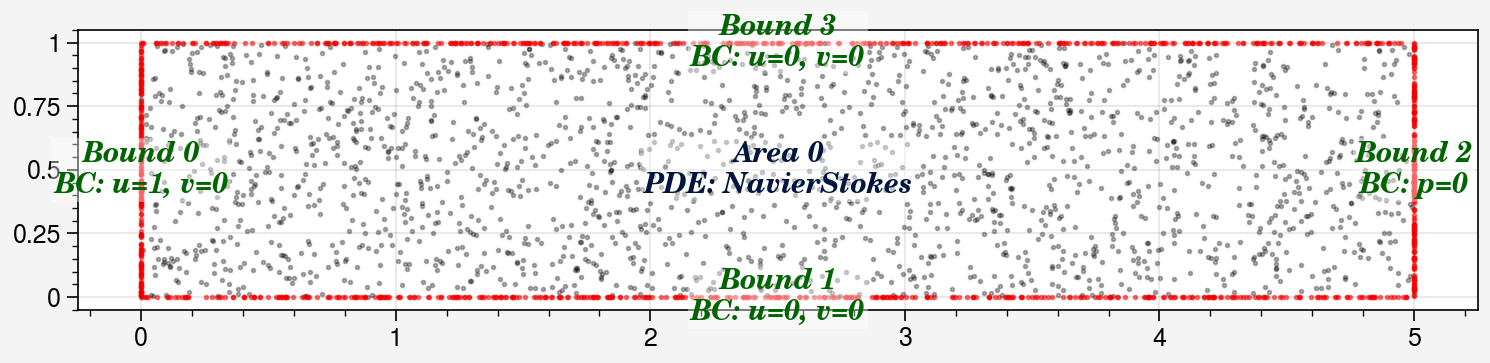

In [3]:
# Sample points: [Left, Bottom, Right, Top], [Interior]
domain.sampling_random([200, 400, 200, 400], [2000])
domain.show_coordinates(display_physics=True)

### 3. Create and Train the Model

In [4]:
model0 = df.PINN(width=32, length=4)
model1, model1_best = model0.train_adam(
    calc_loss = df.calc_loss_simple(domain),
    learning_rate=0.004,
    epochs=2000
)

Epoch: 1, total_loss: 1.12480, bc_loss: 1.12448, pde_loss: 0.00032
Epoch: 200, total_loss: 0.10377, bc_loss: 0.08071, pde_loss: 0.02307
Epoch: 400, total_loss: 0.03862, bc_loss: 0.02990, pde_loss: 0.00872
Epoch: 600, total_loss: 0.02221, bc_loss: 0.01935, pde_loss: 0.00285
Epoch: 800, total_loss: 0.01746, bc_loss: 0.01513, pde_loss: 0.00233
Epoch: 1000, total_loss: 0.01367, bc_loss: 0.01192, pde_loss: 0.00174
Epoch: 1200, total_loss: 0.01207, bc_loss: 0.01046, pde_loss: 0.00161
Epoch: 1400, total_loss: 0.01157, bc_loss: 0.01026, pde_loss: 0.00131
Epoch: 1600, total_loss: 0.00855, bc_loss: 0.00752, pde_loss: 0.00103
Epoch: 1800, total_loss: 0.00771, bc_loss: 0.00666, pde_loss: 0.00104
Epoch: 2000, total_loss: 0.00685, bc_loss: 0.00582, pde_loss: 0.00103


### 4. Visualize Results

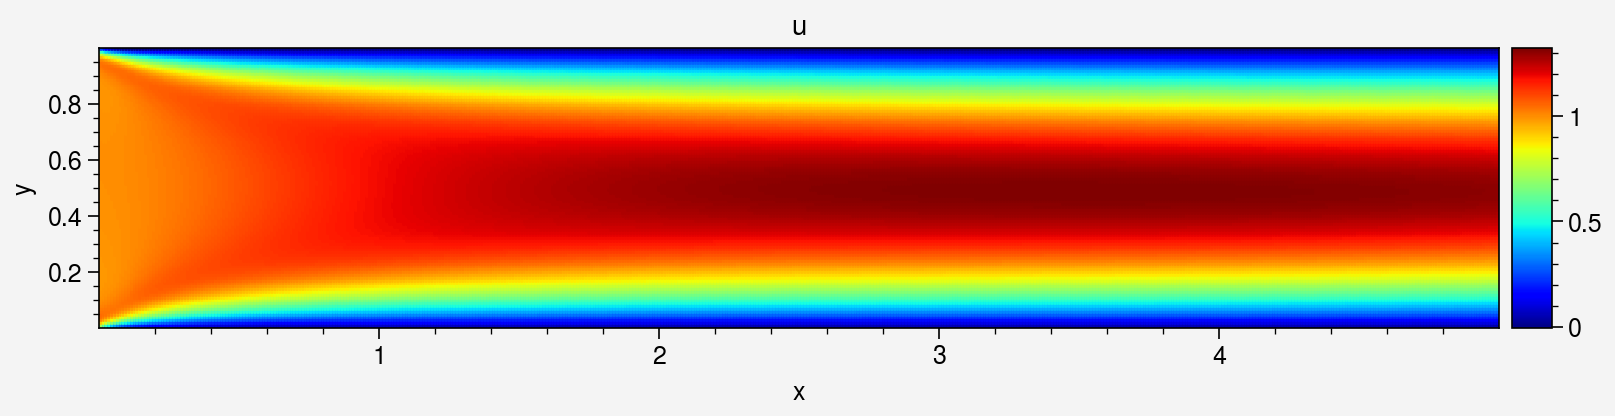

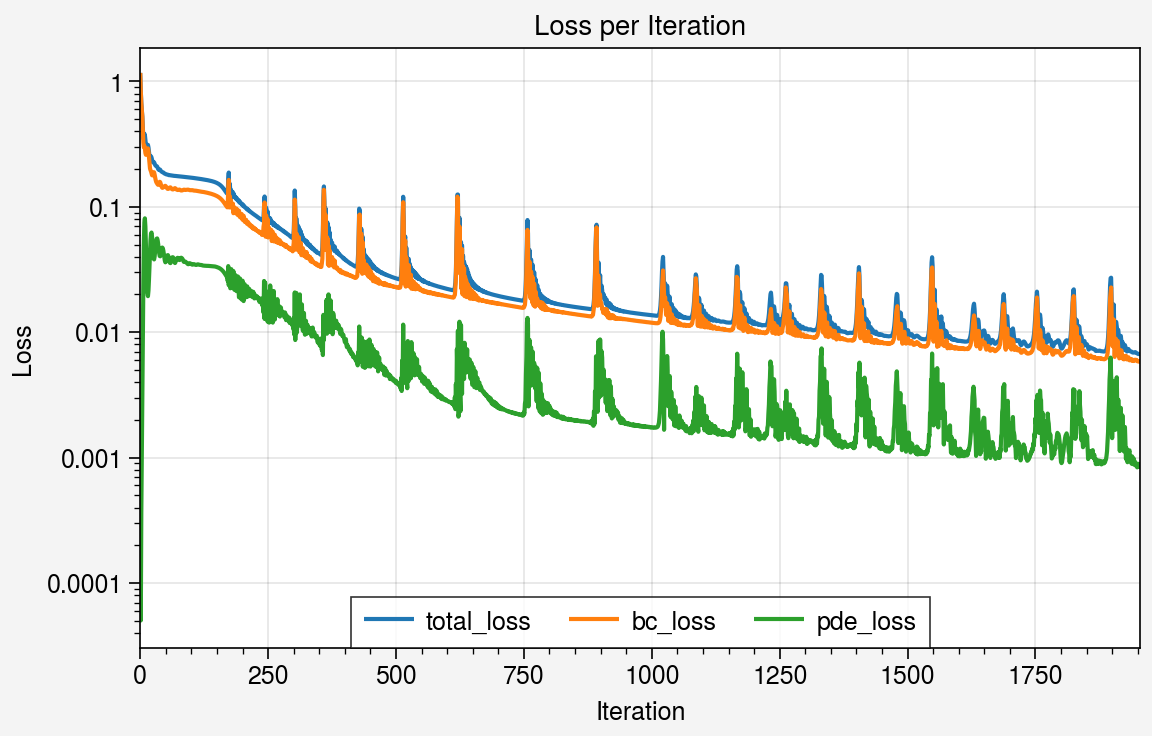

In [5]:
# Evaluate the best model
prediction = domain.area_list[0].evaluate(model1_best)
prediction.sampling_area([500, 100])

# Plot Velocity Field
_ = prediction.plot_color('u', cmap='jet')

# Plot Training Loss
_ =prediction.plot_loss_curve(log_scale=True)